In [3]:
ls

 Le volume dans le lecteur C s'appelle Acer
 Le num�ro de s�rie du volume est B216-A970

 R�pertoire de c:\Users\sophi\OneDrive\Documents\3A_SDI\RL\Ind_Assignment\text-flappy-bird-gym-master

30/03/2023  09:20    <DIR>          .
30/03/2023  09:20    <DIR>          ..
03/03/2023  17:56                17 .gitignore
30/03/2023  09:02    <DIR>          .vscode
25/03/2023  18:05    <DIR>          __pycache__
30/03/2023  09:20    <DIR>          functions
03/03/2023  17:56    <DIR>          imgs
03/03/2023  17:56             1�076 LICENCE
30/03/2023  09:19             1�328 main.py
30/03/2023  09:18    <DIR>          notebooks
03/03/2023  17:56             1�677 README.md
03/03/2023  17:56             1�452 setup.py
03/03/2023  18:00    <DIR>          text_flappy_bird_gym
               5 fichier(s)            5�550 octets
               8 R�p(s)  35�898�216�448 octets libres


In [1]:
import os, sys
import gymnasium as gym
import time

import text_flappy_bird_gym

from functions.Agents import Agent1,Agent2,GreedyAgent, QLearningAgent,MCcontrolAgent, SarsaAgent
from functions.utils import mc_prediction, td_prediction, plot_V

In [2]:
# initiate environment
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)

# MC agent

In [3]:
agent = MCcontrolAgent( env,height = 15, width = 20)
agent.mc_control(env,100000)

print("done training")

Episode 100000/100000.done training


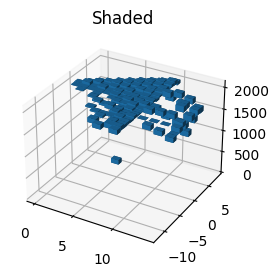

In [4]:
V = td_prediction(env, agent, ep=1000, gamma=1, alpha=0.1)


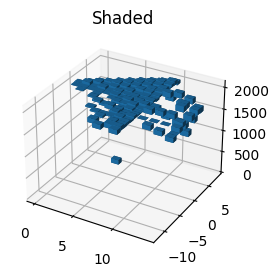

In [6]:
plot_V(V)

In [8]:
obs = env.reset()

obs = obs[0]

actions = []
observations = []
rewards = []
scores = [0]
# iterate
while scores[-1]<10000:

    # Select next action
    action = agent.policy(obs)#env.action_space.sample() #agent.policy(obs)  # ## for an agent, action = agent.policy(observation)
    actions.append(action)

    # Appy action and return new observation of the environment
    obs, reward, done, _, info = env.step(action)
    scores.append(info['score'])
    observations.append(obs)
    rewards.append(reward)

    # If player is dead break
    if done:
        break

env.close()

print("actions",actions)
print("obs",observations)
print("rewards",rewards)
print("scores",scores)

actions [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0

# Qlearning agent

In [3]:
agent = QLearningAgent(env,epsilon = 0.1,alpha=0.1,gamma= 1.0,height = 15, width = 20)#GreedyAgent(V)
agent.training(num_episodes=50000,env=env)

print("done training")

Episode 50000/50000.done training


In [4]:
V = agent.get_valuefunction() #td_prediction(env, agent, ep=1000, gamma=1, alpha=0.1)

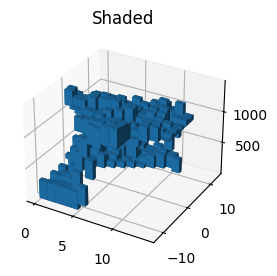

In [5]:
plot_V(V)

In [6]:
obs = env.reset()

obs = obs[0]

actions = []
observations = []
rewards = []
scores = [0]
# iterate
while scores[-1]<10000:

    # Select next action
    action = agent.policy(obs)#env.action_space.sample() #agent.policy(obs)  # ## for an agent, action = agent.policy(observation)
    actions.append(action)

    # Appy action and return new observation of the environment
    obs, reward, done, _, info = env.step(action)
    scores.append(info['score'])
    observations.append(obs)
    rewards.append(reward)

    # If player is dead break
    if done:
        break

env.close()

print("actions",actions)
print("obs",observations)
print("rewards",rewards)
print("scores",scores)

actions [1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0

# Sarsa agent 

In [3]:
agent = SarsaAgent(env,epsilon = 0.1,alpha=0.1,gamma= 1.0,height = 15, width = 20)#GreedyAgent(V)
agent.training(num_episodes=50000,env=env)

print("done training")

Episode 50000/50000.done training


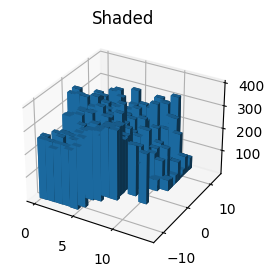

In [4]:
V = agent.get_valuefunction() 
plot_V(V)

In [5]:
obs = env.reset()

obs = obs[0]

actions = []
observations = []
rewards = []
scores = [0]
# iterate
while scores[-1]<10000:

    # Select next action
    action = agent.policy(obs)#env.action_space.sample() #agent.policy(obs)  # ## for an agent, action = agent.policy(observation)
    actions.append(action)

    # Appy action and return new observation of the environment
    obs, reward, done, _, info = env.step(action)
    scores.append(info['score'])
    observations.append(obs)
    rewards.append(reward)

    # If player is dead break
    if done:
        break

env.close()

print("actions",actions)
print("obs",observations)
print("rewards",rewards)
print("scores",scores)

actions [1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0

# Parameters

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm

Episode 3000/3000.

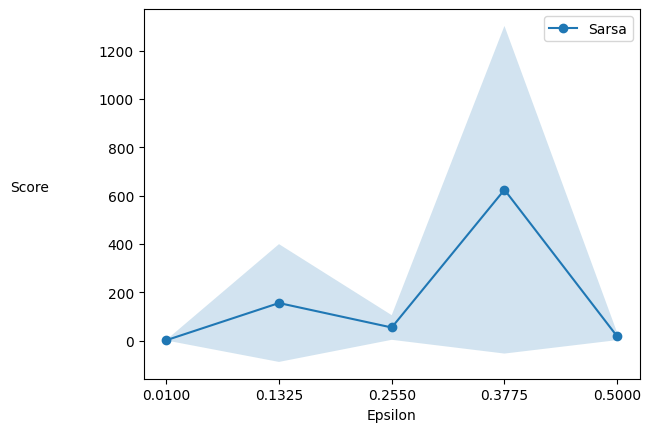

In [37]:

env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
all_reward_sums = {}
step_sizes = np.linspace(0.01,0.5,5)
num_episodes = 3000
num_exp = 10
all_reward_sums = {}

for step_size in step_sizes:
    all_reward_sums[step_size] = []
    agent = SarsaAgent(env,epsilon = step_size,alpha=0.325,gamma= 1.0,height = 15, width = 20)#GreedyAgent(V)
    agent.training(num_episodes=num_episodes,env=env)

    return_sum = 0
    for episode in range(num_exp):
        obs = env.reset()
        obs = obs[0]
        score =0
        while score<10000:

            # Select next action
            action = agent.policy(obs)#env.action_space.sample() #agent.policy(obs)  # ## for an agent, action = agent.policy(observation)

            obs, reward, done, _, info = env.step(action)
            score = info['score']

            # If player is dead break
            if done:
                break
        return_sum = score
        all_reward_sums[step_size].append(return_sum)
        

algorithm_means = np.array([np.mean(all_reward_sums[step_size]) for step_size in step_sizes])
algorithm_stds = np.array([np.std(all_reward_sums[step_size]) for step_size in step_sizes])

plt.plot(step_sizes, algorithm_means, marker='o', linestyle='solid', label='Sarsa')
plt.fill_between(step_sizes, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)

plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Score",rotation=0, labelpad=50)
plt.xticks(step_sizes)
plt.show()

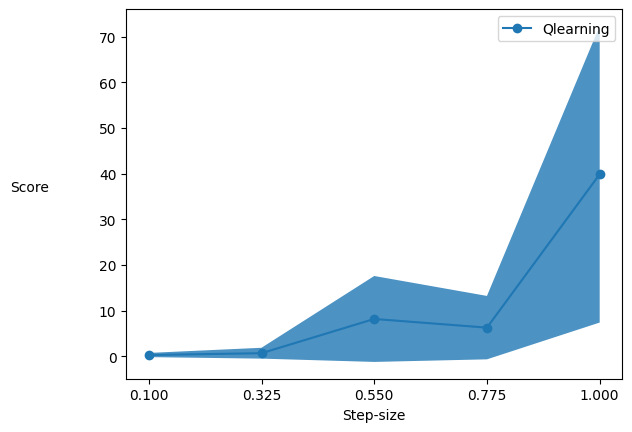

In [34]:
plt.plot(step_sizes, algorithm_means, marker='o', linestyle='solid', label='Qlearning')
plt.fill_between(step_sizes, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.8)


plt.legend()
plt.xlabel("Step-size")
plt.ylabel("Score",rotation=0, labelpad=50)
plt.xticks(step_sizes)
plt.show()

In [29]:
algorithm_stds

array([  4.64758002,   0.        , 100.21402098,   1.32664992,
         4.96386946])

# Scores

Episode 10000/10000.

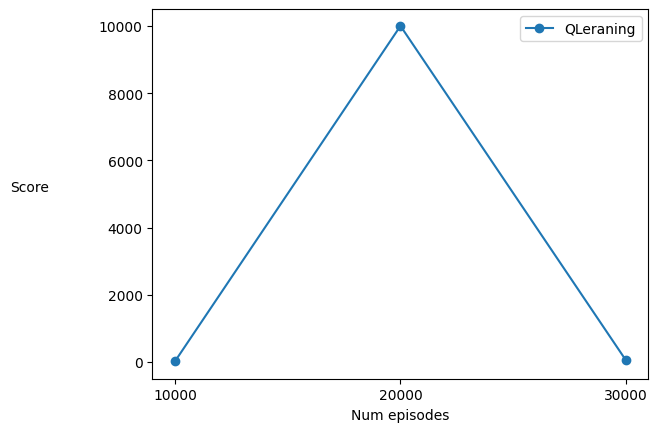

In [46]:
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
all_reward_sums = {}
num_episodes = 30000
all_reward_sums = {}
num_exp = 10

agent = QLearningAgent(env,epsilon = 0.3775,alpha=0.325,gamma= 1.0,height = 15, width = 20)

for step in range(1,4):
    all_reward_sums[step*10000] = []
    agent.training(num_episodes=10000,env=env)

    return_sum = 0
    for episode in range(num_exp):
        obs = env.reset()
        obs = obs[0]
        score =0
        score =0
        while score<10000:

            # Select next action
            action = agent.policy(obs)#env.action_space.sample() #agent.policy(obs)  # ## for an agent, action = agent.policy(observation)

            obs, reward, done, _, info = env.step(action)
            score = info['score']

            # If player is dead break
            if done:
                break
        return_sum = score
        all_reward_sums[step*10000].append(return_sum)
        

algorithm_means = np.array([np.mean(all_reward_sums[k]) for k in all_reward_sums.keys()])
algorithm_stds = np.array([np.std(all_reward_sums[k]) for k in all_reward_sums.keys()])

plt.plot([ k  for k in all_reward_sums.keys()], algorithm_means, marker='o', linestyle='solid', label='QLeraning')
plt.fill_between([ k  for k in all_reward_sums.keys()], algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)

plt.legend()
plt.xlabel("Num episodes")
plt.ylabel("Score",rotation=0, labelpad=50)
plt.xticks([ k  for k in all_reward_sums.keys()])
plt.show()

In [48]:
all_reward_sums

{10000: [10, 7, 65, 3, 36, 17, 4, 15, 6, 45],
 20000: [10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000, 10000],
 30000: [53, 59, 73, 39, 17, 55, 107, 38, 7, 47]}

In [59]:
env = gym.make('TextFlappyBird-v0', height = 15, width = 20, pipe_gap = 4)
all_reward_sums = []

agent = QLearningAgent(env,epsilon = 0.1,alpha=0.325,gamma= 1.0,height = 15, width = 20)

for step in range(1,9):
    agent.training(num_episodes=1000,env=env)

    obs = env.reset()
    obs = obs[0]
    score =0
    while score<10000:

        # Select next action
        action = agent.policy(obs)#env.action_space.sample() #agent.policy(obs)  # ## for an agent, action = agent.policy(observation)

        obs, reward, done, _, info = env.step(action)
        score = info['score']

        # If player is dead break
        if done:
            break
    all_reward_sums.append(score)
    print(score)

Episode 1000/1000.23
Episode 1000/1000.31
Episode 1000/1000.47
Episode 1000/1000.331
Episode 1000/1000.75
Episode 1000/1000.402
Episode 1000/1000.2259
Episode 1000/1000.167


In [52]:
all_reward_sums[0:-1]

[4, 13, 36, 184, 20, 10000, 10000, 10000]

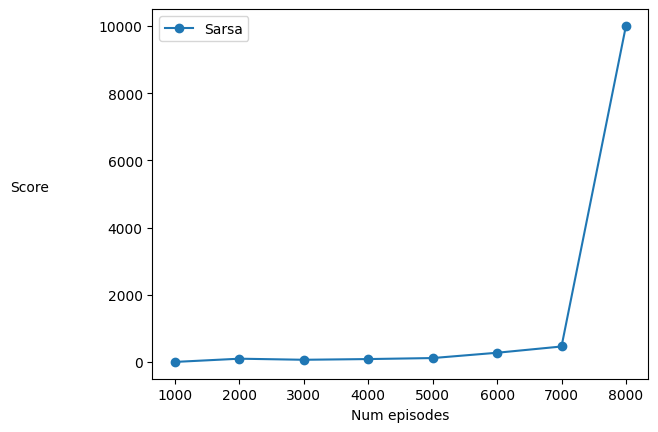

In [55]:
plt.plot([ k*1000  for k in range(1,9)], all_reward_sums[0:-1], marker='o', linestyle='solid', label='Sarsa')

plt.legend()
plt.xlabel("Num episodes")
plt.ylabel("Score",rotation=0, labelpad=50)
plt.xticks([ k*1000  for k in range(1,9)])
plt.show()

In [ ]:
[4, 13, 36, 184, 20, 10000, 10000, 10000]

